In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Yüz Kesme**

--2024-07-19 11:51:32--  https://huggingface.co/public-data/dlib_face_landmark_model/resolve/main/shape_predictor_68_face_landmarks.dat
Resolving huggingface.co (huggingface.co)... 18.164.174.17, 18.164.174.118, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.17|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/91/eb/91eb4c409185f111a5225be4b555542503d52e1405fa36dfefef869caafc06b4/fbdc2cb80eb9aa7a758672cbfdda32ba6300efe9b6e6c7a299ff7e736b11b92f?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27shape_predictor_68_face_landmarks.dat%3B+filename%3D%22shape_predictor_68_face_landmarks.dat%22%3B&Expires=1721649058&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMTY0OTA1OH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy85MS9lYi85MWViNGM0MDkxODVmMTExYTUyMjViZTRiNTU1NTQyNTAzZDUyZTE0MDVmYTM2ZGZlZmVmODY5Y2FhZmMwNmI0L2ZiZGMyY2I4MG

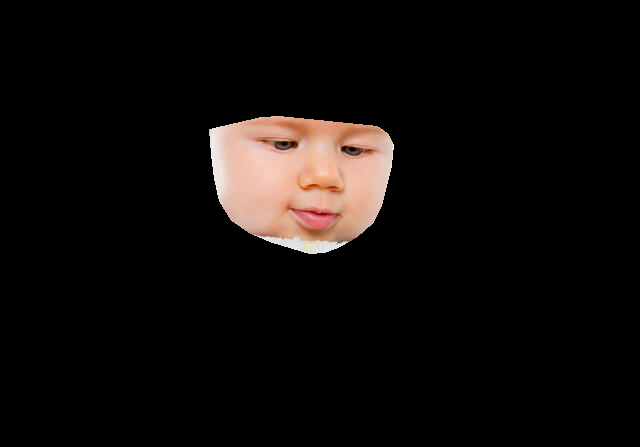

Face extraction completed.


In [ ]:
import cv2
import numpy as np
import dlib
from google.colab.patches import cv2_imshow

def extract_index_nparray(nparray):
    index = None
    for num in nparray[0]:
        index = num
        break
    return index

# Download the shape_predictor_68_face_landmarks.dat file
!wget https://huggingface.co/public-data/dlib_face_landmark_model/resolve/main/shape_predictor_68_face_landmarks.dat -O shape_predictor_68_face_landmarks.dat

# Load the image
img = cv2.imread("/content/drive/MyDrive/Bebek Fotoğrafları/alamy_290-315_babyPhotos/2a439md.jpg")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = np.zeros_like(img_gray)

detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("shape_predictor_68_face_landmarks.dat")

# Face 1
faces = detector(img_gray)
for face in faces:
    landmarks = predictor(img_gray, face)
    landmarks_points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        landmarks_points.append((x, y))

    points = np.array(landmarks_points, np.int32)
    convexhull = cv2.convexHull(points)
    cv2.fillConvexPoly(mask, convexhull, 255)

    face_image_1 = cv2.bitwise_and(img, img, mask=mask)

    # Display the extracted face part from face 1
    cv2_imshow(face_image_1)

print("Face extraction completed.")


# **Yüz Landmarking**

--2024-07-19 11:52:50--  https://huggingface.co/public-data/dlib_face_landmark_model/resolve/main/shape_predictor_68_face_landmarks.dat
Resolving huggingface.co (huggingface.co)... 18.164.174.55, 18.164.174.118, 18.164.174.23, ...
Connecting to huggingface.co (huggingface.co)|18.164.174.55|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://cdn-lfs.huggingface.co/repos/91/eb/91eb4c409185f111a5225be4b555542503d52e1405fa36dfefef869caafc06b4/fbdc2cb80eb9aa7a758672cbfdda32ba6300efe9b6e6c7a299ff7e736b11b92f?response-content-disposition=inline%3B+filename*%3DUTF-8%27%27shape_predictor_68_face_landmarks.dat%3B+filename%3D%22shape_predictor_68_face_landmarks.dat%22%3B&Expires=1721649170&Policy=eyJTdGF0ZW1lbnQiOlt7IkNvbmRpdGlvbiI6eyJEYXRlTGVzc1RoYW4iOnsiQVdTOkVwb2NoVGltZSI6MTcyMTY0OTE3MH19LCJSZXNvdXJjZSI6Imh0dHBzOi8vY2RuLWxmcy5odWdnaW5nZmFjZS5jby9yZXBvcy85MS9lYi85MWViNGM0MDkxODVmMTExYTUyMjViZTRiNTU1NTQyNTAzZDUyZTE0MDVmYTM2ZGZlZmVmODY5Y2FhZmMwNmI0L2ZiZGMyY2I4MG

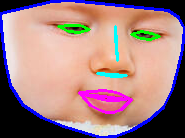

In [ ]:
import cv2
import dlib
import numpy as np
from google.colab.patches import cv2_imshow

# Download the shape_predictor_68_face_landmarks.dat file if needed
!wget https://huggingface.co/public-data/dlib_face_landmark_model/resolve/main/shape_predictor_68_face_landmarks.dat -O shape_predictor_68_face_landmarks.dat

# Load the image
image_path = '/content/drive/MyDrive/Bebek Fotoğrafları/alamy_290-315_babyPhotos/2a439md.jpg'
img = cv2.imread(image_path)

# Check if the image loaded successfully
if img is None:
    print(f"Error: Could not load image from path {image_path}")
    exit()

# Convert the image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Initialize dlib's face detector (HOG-based) and facial landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')

# Detect faces in the image
faces = detector(gray)

# Function to draw convex hull for a set of points
def draw_convex_hull(image, points, color):
    hull = cv2.convexHull(points)
    cv2.polylines(image, [hull], isClosed=True, color=color, thickness=2)

# Process each detected face
for face in faces:
    landmarks = predictor(gray, face)
    points = []
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        points.append((x, y))

    points = np.array(points, np.int32)
    convexhull = cv2.convexHull(points)

    # Create a mask for the face
    mask = np.zeros_like(gray)
    cv2.fillConvexPoly(mask, convexhull, 255)

    # Extract the face using the mask
    face_image = cv2.bitwise_and(img, img, mask=mask)

    # Get the bounding box of the face
    x, y, w, h = cv2.boundingRect(convexhull)
    face_cropped = face_image[y:y+h, x:x+w]

    # Draw the convex hull on the cropped face
    cv2.polylines(face_cropped, [convexhull - [x, y]], isClosed=True, color=(255, 0, 0), thickness=2)

    # Save the cropped face for further processing
    face_cropped_path = 'face_cropped.png'
    cv2.imwrite(face_cropped_path, face_cropped)

print("Face extraction and edge highlighting completed.")

# Load the face-cropped image for further processing
face_cropped_img = cv2.imread(face_cropped_path)

# Convert the face-cropped image to grayscale
face_cropped_gray = cv2.cvtColor(face_cropped_img, cv2.COLOR_BGR2GRAY)

# Detect faces in the face-cropped image
faces_cropped = detector(face_cropped_gray)

# Process each detected face in the cropped image
for face in faces_cropped:
    landmarks = predictor(face_cropped_gray, face)

    # Define the points for different face features
    right_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(36, 42)], np.int32)
    left_eye_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(42, 48)], np.int32)
    outer_lip_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(48, 60)], np.int32)
    inner_lip_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(60, 68)], np.int32)
    nose_bridge_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(27, 31)], np.int32)
    lower_nose_points = np.array([(landmarks.part(n).x, landmarks.part(n).y) for n in range(31, 36)], np.int32)

    # Draw the convex hulls for the face features
    draw_convex_hull(face_cropped_img, right_eye_points, (0, 255, 0))
    draw_convex_hull(face_cropped_img, left_eye_points, (0, 255, 0))
    draw_convex_hull(face_cropped_img, outer_lip_points, (255, 0, 255))
    draw_convex_hull(face_cropped_img, inner_lip_points, (255, 0, 255))
    draw_convex_hull(face_cropped_img, nose_bridge_points, (255, 255, 0))
    draw_convex_hull(face_cropped_img, lower_nose_points, (255, 255, 0))

# Display the face-cropped image with facial features convex hull
cv2_imshow(face_cropped_img)
